# Data Visualization with Python Matplotlib

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv('retail.csv')

#### Pengenalan dataset

In [3]:
print('ukuran dataset: %d baris dan %d kolom' % retail.shape)

ukuran dataset: 5000 baris dan 9 kolom


In [4]:
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


#### Penambahan kolom order month pada dataset

In [5]:
retail['order_month'] = retail['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


#### Penambahan kolom GMV (Gross Merchandise Volume)

In [6]:
retail['gmv'] = retail['quantity'] * retail['item_price']
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


#### Pembuatan data agregat

In [7]:
monthly_amount = retail.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


#### Pembuatan line chart trend pertumbuhan GMV

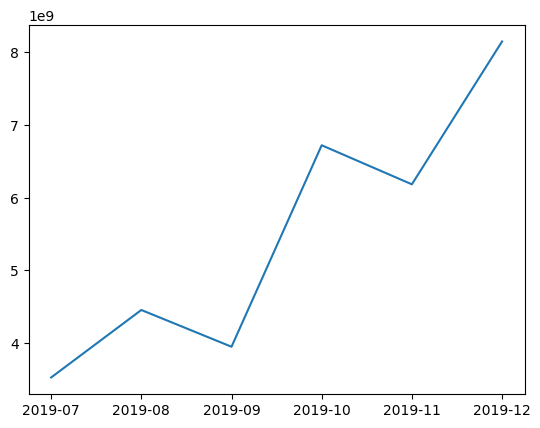

In [8]:
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

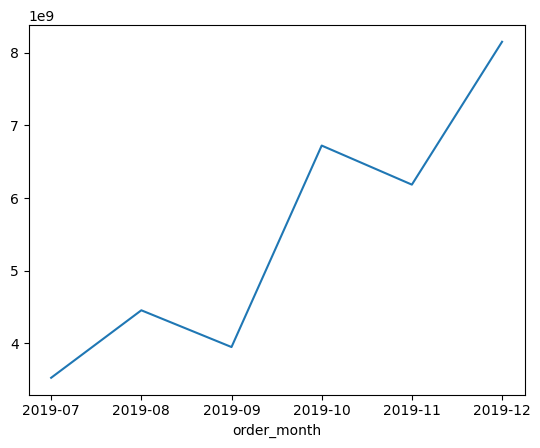

In [9]:
retail.groupby('order_month')['gmv'].sum().plot()
plt.show()

#### Mengubah figure size

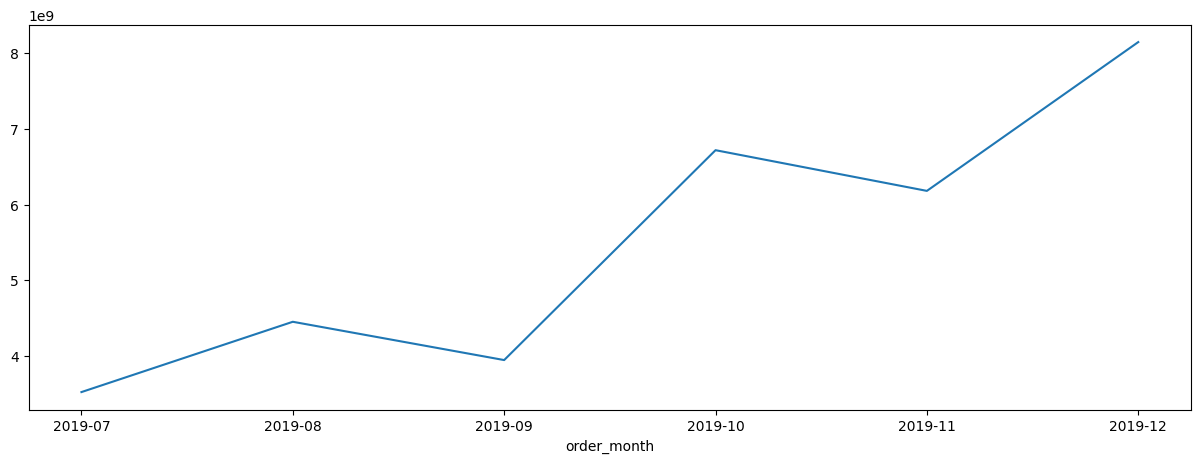

In [10]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot()
plt.show()

#### Penambahan title and axis labels

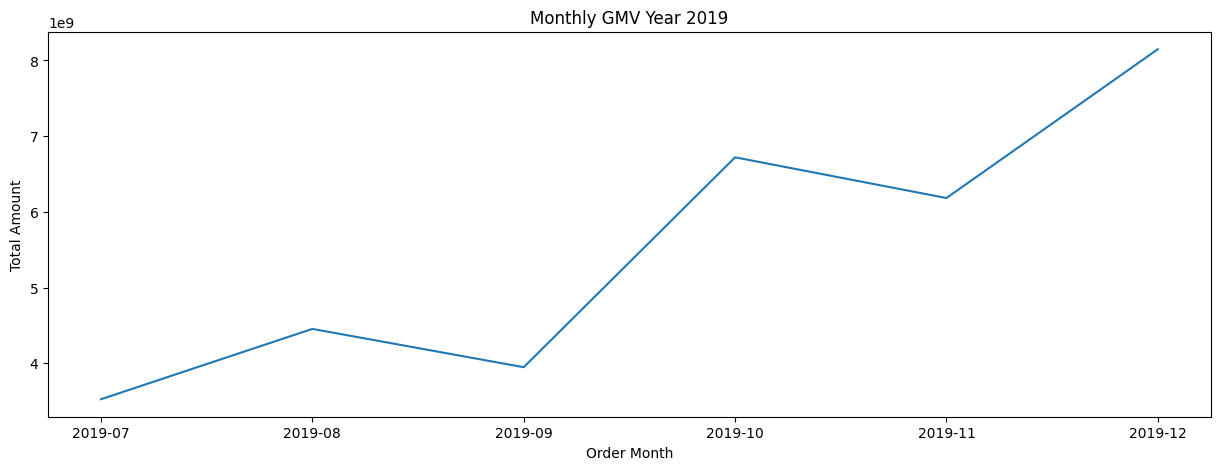

In [11]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total Amount')
plt.show()

#### Kustomisasi title and axis labels

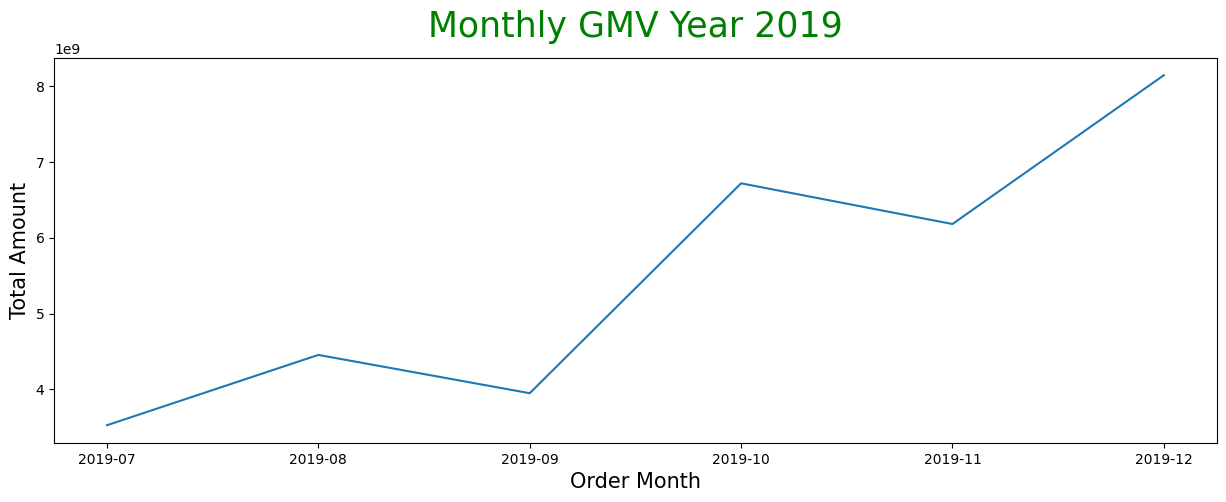

In [12]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount', fontsize = 15)
plt.show()

#### Kustomisasi line and point

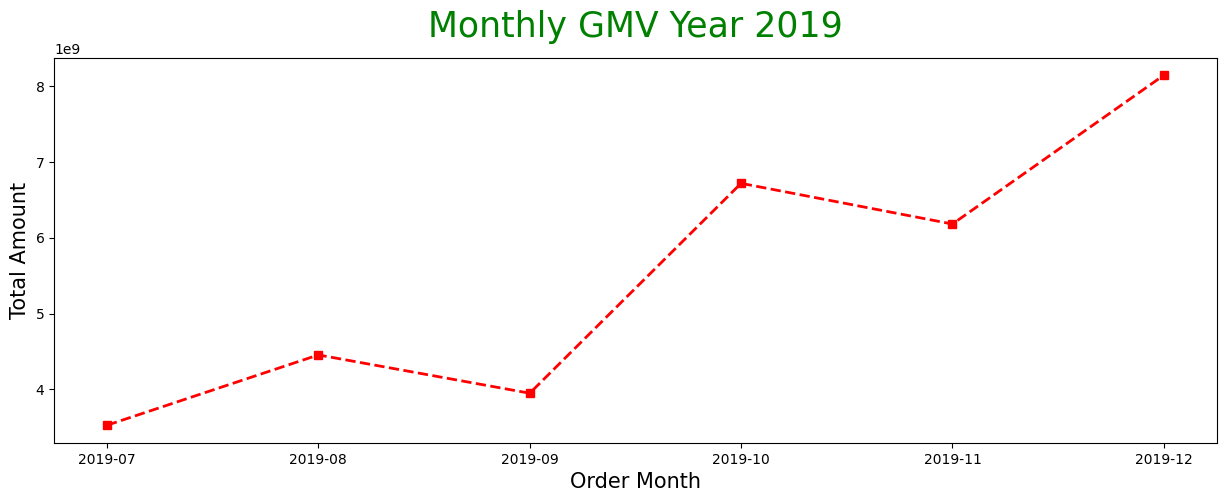

In [13]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot(color = 'red', linewidth = 2, linestyle = '--', marker = 's')
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount', fontsize = 15)
plt.show()

#### Kustomisasi grid

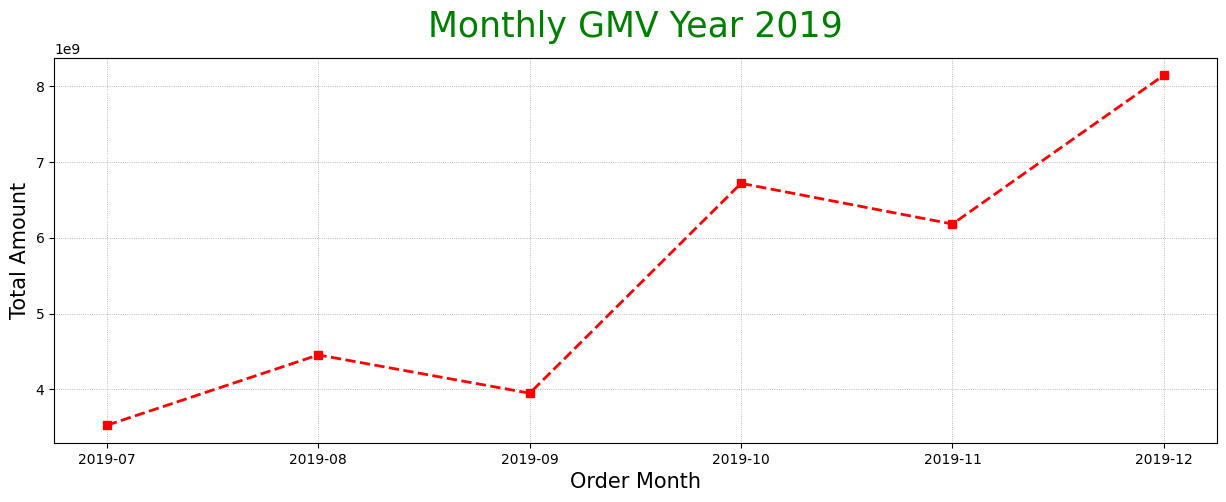

In [14]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot(color = 'red', linewidth = 2, linestyle = '--', marker = 's')
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.show()

#### Kustomisasi axis ticks

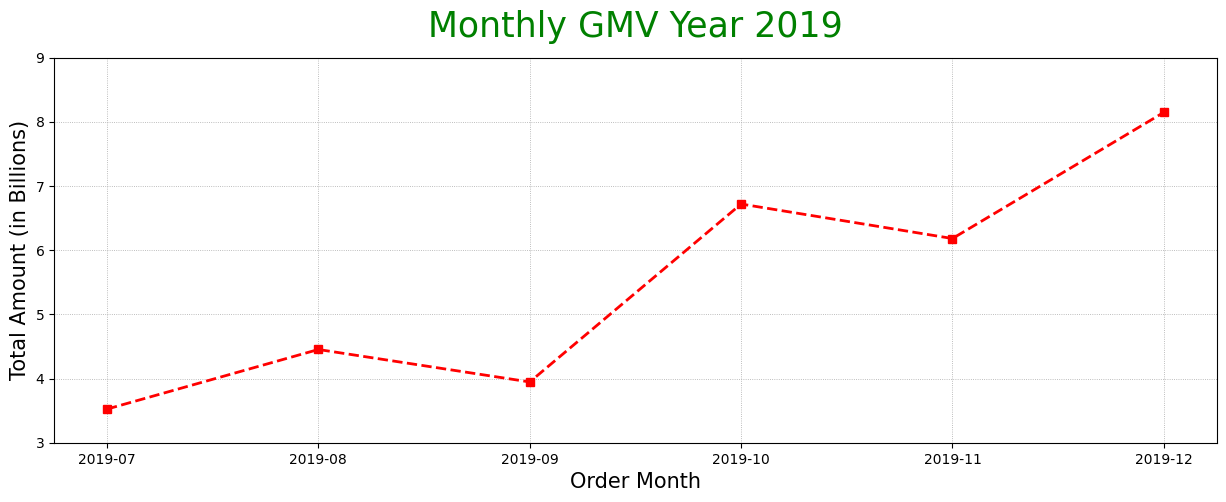

In [15]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot(color = 'red', linewidth = 2, linestyle = '--', marker = 's')
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

#### Penentuan batas minimum dan maksimum axis ticks

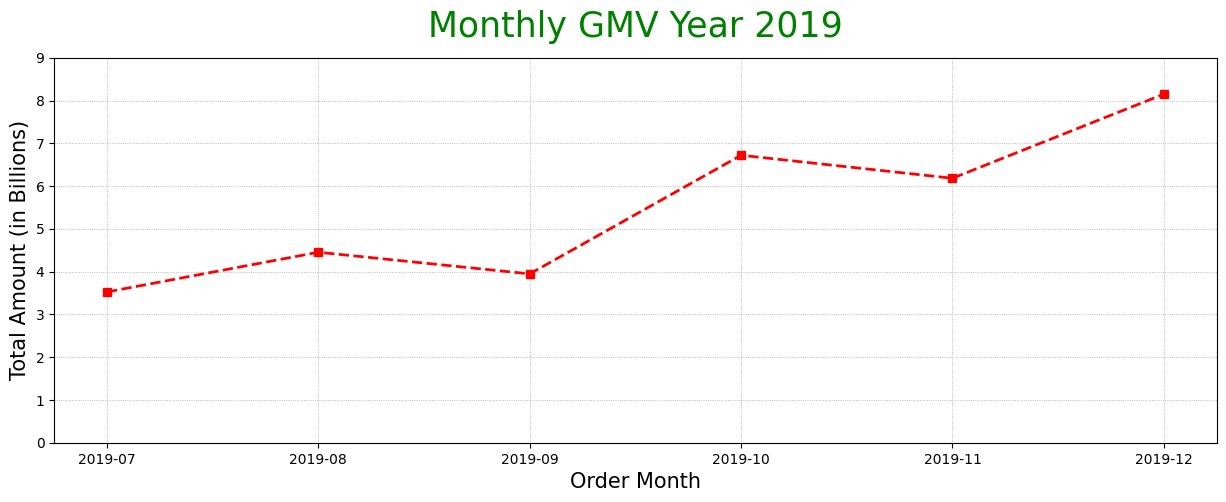

In [16]:
plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot(color = 'red', linewidth = 2, linestyle = '--', marker = 's')
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

#### Penambahan informasi pada plot

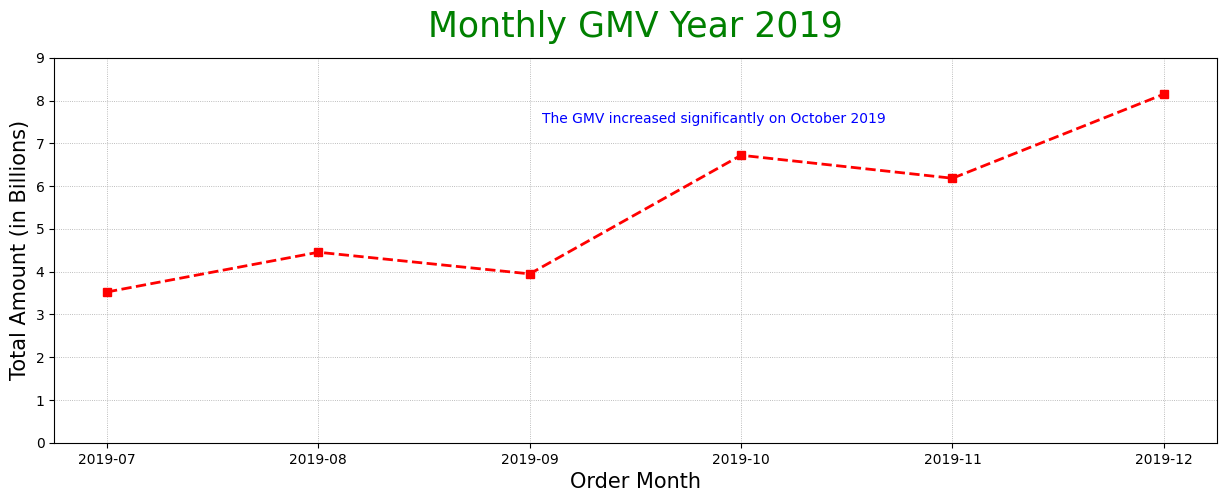

In [17]:
figure = plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot(color = 'red', linewidth = 2, linestyle = '--', marker = 's')
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.75, 'The GMV increased significantly on October 2019', transform = figure.transFigure, color = 'blue')
plt.show()

#### Menyimpan hasil plot menjadi file image

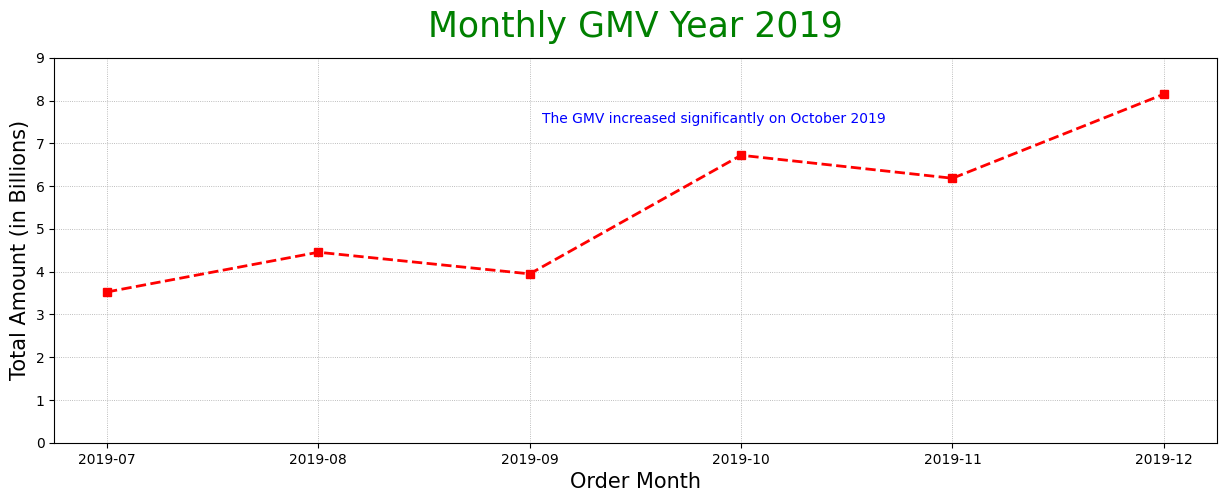

In [18]:
figure = plt.figure(figsize = (15, 5))
retail.groupby('order_month')['gmv'].sum().plot(color = 'red', linewidth = 2, linestyle = '--', marker = 's')
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.75, 'The GMV increased significantly on October 2019', transform = figure.transFigure, color = 'blue')
plt.savefig('monthly_gmv.png', dpi = 1000)
plt.show()

Untuk mengetahui tipe file apa saja yang dapat disimpan dapat menggunakan syntax berikut.

In [19]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

#### Pembuatan multi-line chart

In [20]:
retail.groupby(['order_month', 'brand'])['gmv'].sum().unstack()

brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
order_month,,,,,,,,,,
2019-07,326713000,260605000,272511000,89936000,348151000,244413000,394808000,473672000,816882000,296350000
2019-08,357401000,293799000,380110000,160446000,645394000,402161000,618439000,427185000,744362000,423626000
2019-09,258873000,217258000,288637000,168769000,430580000,237654000,530957000,451353000,943807000,419114000
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


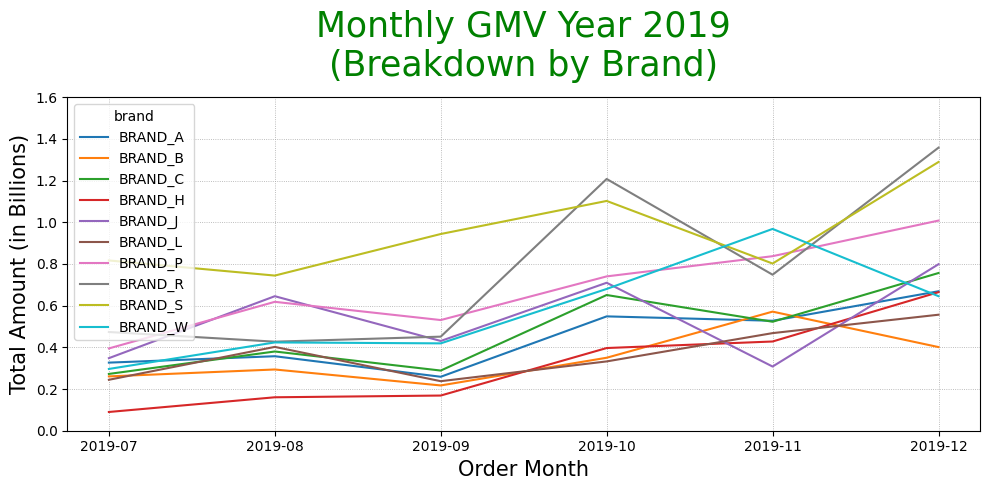

In [21]:
retail.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019\n(Breakdown by Brand)', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#### Kustomisasi legend

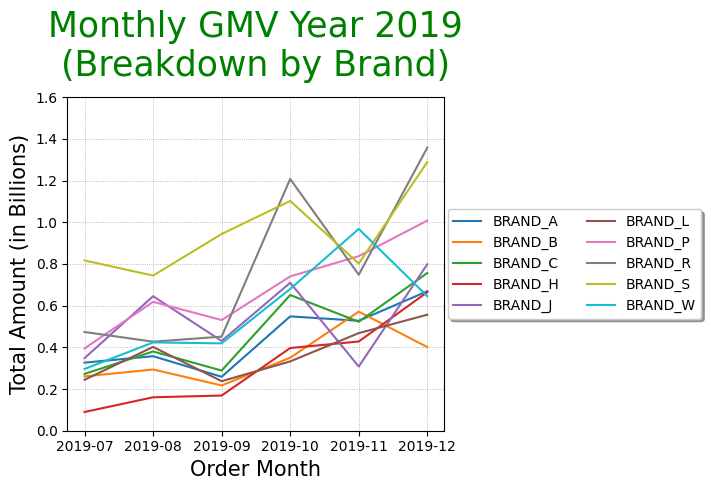

In [22]:
retail.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019\n(Breakdown by Brand)', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.legend(loc = 'right',  bbox_to_anchor = (1.7, 0.5), shadow = True, ncol = 2)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#### Kustomisasi colormap

In [23]:
retail.groupby(['order_month', 'province'])['gmv'].sum().unstack()

province,Bali,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_month,,,,,,,
2019-07,79480000,191513000,1951871000,476533000,252429000,282076000,290139000
2019-08,125025000,254130000,2014393000,735536000,507441000,324629000,491769000
2019-09,214442000,89088000,1469887000,886835000,607802000,268764000,410184000
2019-10,166994000,338610000,3272151000,1225234000,657536000,501911000,557501000
2019-11,170644000,153618000,2734964000,1247305000,429731000,646017000,799950000
2019-12,444627000,468673000,3459497000,1556706000,1030945000,626089000,561698000


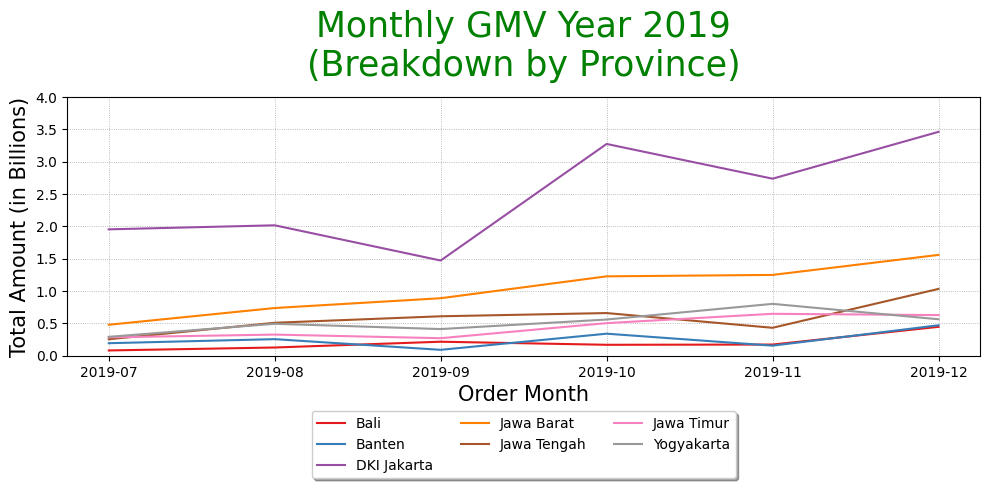

In [24]:
retail.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap = 'Set1')
plt.title('Monthly GMV Year 2019\n(Breakdown by Province)', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.legend(loc = 'lower center',  bbox_to_anchor = (0.5, -0.5), shadow = True, ncol = 3)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

#### Pembuatan line chart GMV breakdown by top provinces

In [25]:
retail.groupby('province')['gmv'].sum().reset_index()

,province,gmv
0,Bali,1201212000
1,Banten,1495632000
2,DKI Jakarta,14902763000
3,Jawa Barat,6128149000
4,Jawa Tengah,3485884000
5,Jawa Timur,2649486000
6,Yogyakarta,3111241000


In [26]:
top_provinces = retail.groupby('province')['gmv'].sum().reset_index().sort_values(by = 'gmv', ascending = False).head()
top_provinces

,province,gmv
2,DKI Jakarta,14902763000
3,Jawa Barat,6128149000
4,Jawa Tengah,3485884000
6,Yogyakarta,3111241000
5,Jawa Timur,2649486000


In [27]:
retail['province_top'] = retail['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')
retail.tail()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12,900000,other
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07,4395000,Jawa Barat
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000,DKI Jakarta
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000,DKI Jakarta
4999,1720036,2019-11-24,17609,Jakarta Pusat,DKI Jakarta,P3334,BRAND_S,1,1045000,2019-11,1045000,DKI Jakarta


In [28]:
retail.groupby(['order_month', 'province_top'])['gmv'].sum().unstack()

province_top,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta,other
order_month,,,,,,
2019-07,1951871000,476533000,252429000,282076000,290139000,270993000
2019-08,2014393000,735536000,507441000,324629000,491769000,379155000
2019-09,1469887000,886835000,607802000,268764000,410184000,303530000
2019-10,3272151000,1225234000,657536000,501911000,557501000,505604000
2019-11,2734964000,1247305000,429731000,646017000,799950000,324262000
2019-12,3459497000,1556706000,1030945000,626089000,561698000,913300000


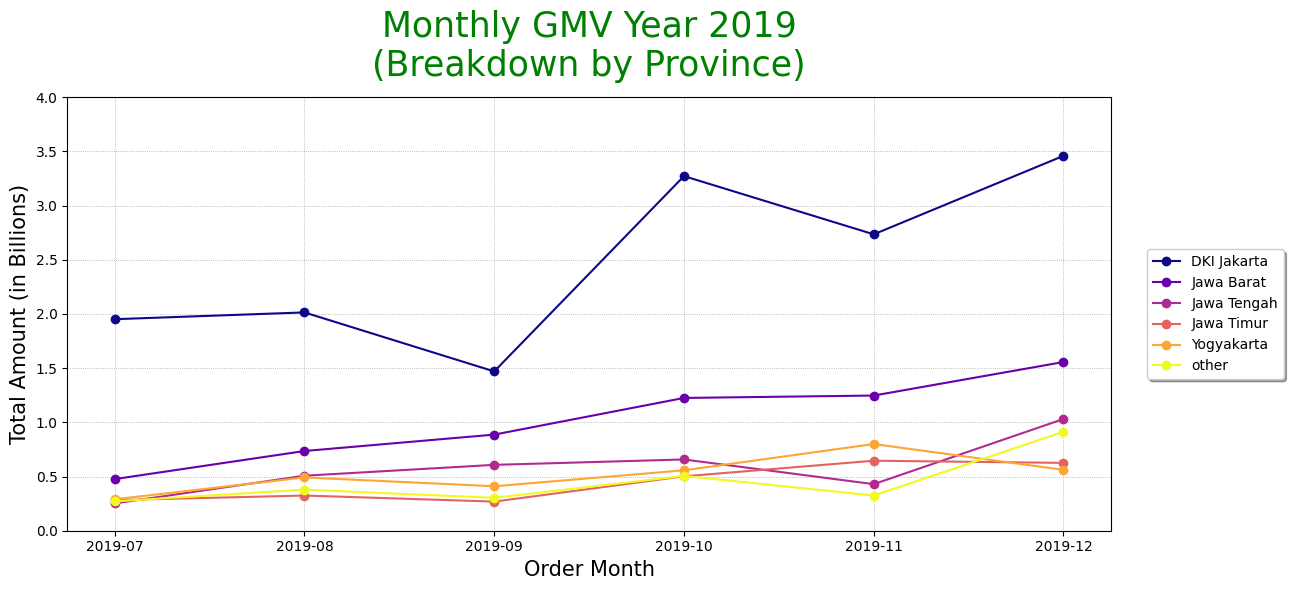

In [29]:
retail.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(cmap = 'plasma', marker = 'o')
plt.title('Monthly GMV Year 2019\n(Breakdown by Province)', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.legend(loc = 'center',  bbox_to_anchor = (1.1, 0.5), shadow = True, ncol = 1)
plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

#### Membuat anotasi

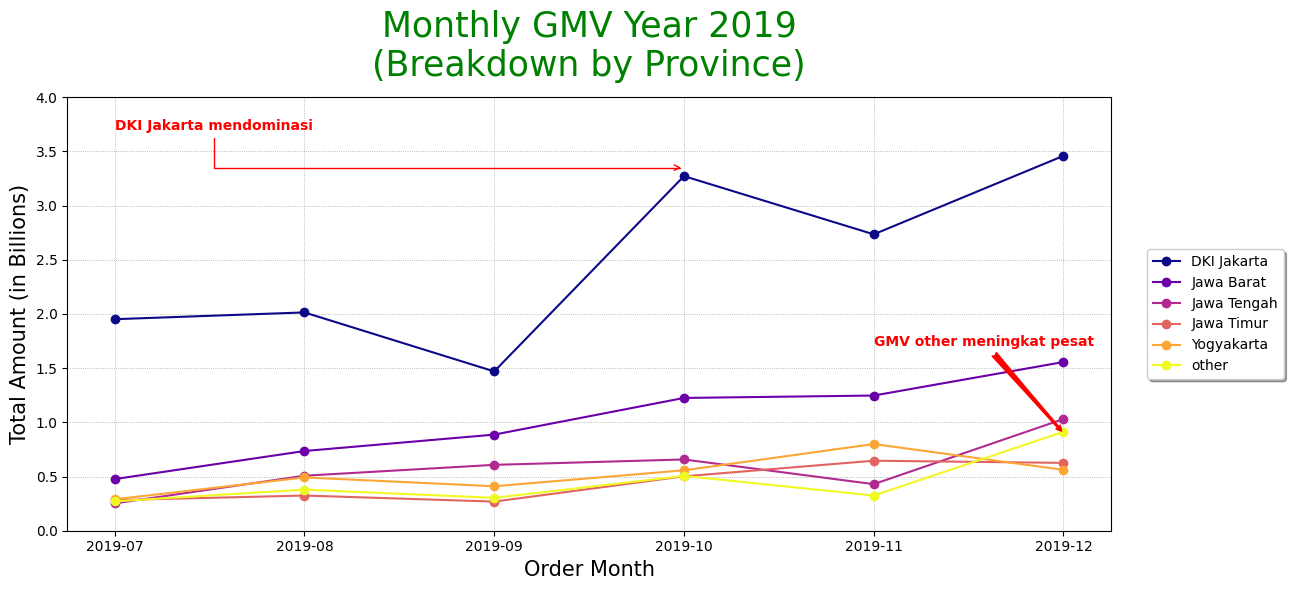

In [30]:
retail.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(cmap = 'plasma', marker = 'o')
plt.title('Monthly GMV Year 2019\n(Breakdown by Province)', loc = 'center', pad = 15, fontsize = 25, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.6)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.legend(loc = 'center',  bbox_to_anchor = (1.1, 0.5), shadow = True, ncol = 1)
plt.annotate('DKI Jakarta mendominasi', xy = (3, 3350000000), xytext = (0, 3700000000),
             weight = 'bold', color = 'red',
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'angle', color = 'red'))
plt.annotate('GMV other meningkat pesat', xy = (5, 900000000), xytext = (4, 1700000000),
            weight = 'bold', color ='red',
            arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3', color = 'red'))
plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

#### Membuat subset data

In [31]:
retail_dki_q4 = retail[(retail['province'] == 'DKI Jakarta') & (retail['order_month'] >= '2019-10')]
retail_dki_q4.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta


#### Membuat pie chart

In [32]:
gmv_per_city_dki_q4 = retail_dki_q4.groupby('city')['gmv'].sum().reset_index()
gmv_per_city_dki_q4

,city,gmv
0,Jakarta Barat,1379965000
1,Jakarta Pusat,2365298000
2,Jakarta Selatan,3429610000
3,Jakarta Timur,1163646000
4,Jakarta Utara,1128093000


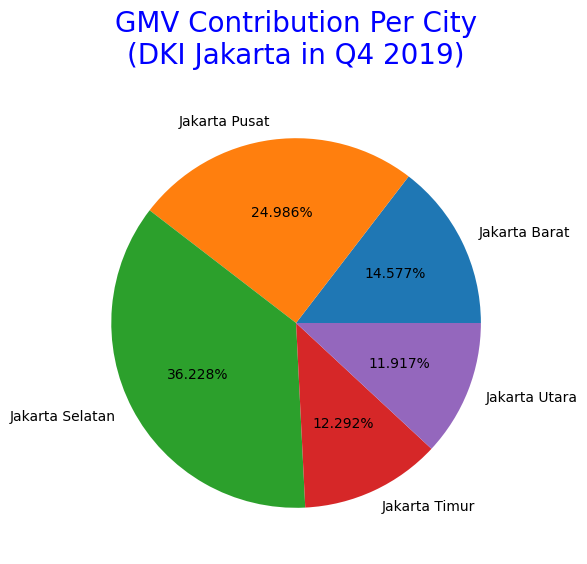

In [33]:
plt.figure(figsize = (6, 6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct = '%1.3f%%')
plt.title('GMV Contribution Per City\n(DKI Jakarta in Q4 2019)', loc = 'center', pad = 20, fontsize = 20, color = 'blue')
plt.show()

#### Membuat bar chart

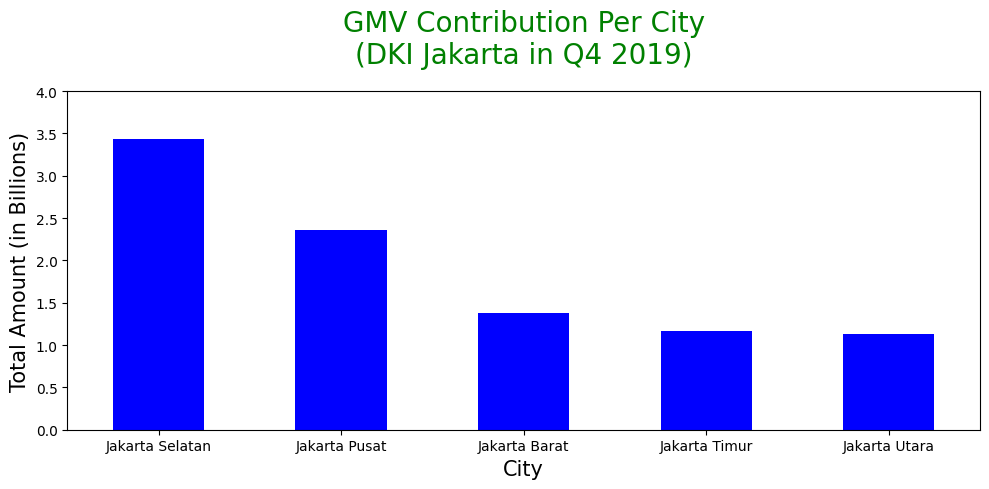

In [34]:
retail_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
plt.title('GMV Contribution Per City\n(DKI Jakarta in Q4 2019)', loc = 'center',
          pad = 20, fontsize = 20, color = 'green')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.xticks(rotation = 0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#### Membuat multi-bar chart

In [35]:
retail_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack()

order_month,2019-10,2019-11,2019-12
city,,,
Jakarta Barat,375094000,429780000,575091000
Jakarta Pusat,849294000,764062000,751942000
Jakarta Selatan,1462272000,982906000,984432000
Jakarta Timur,348055000,296121000,519470000
Jakarta Utara,237436000,262095000,628562000


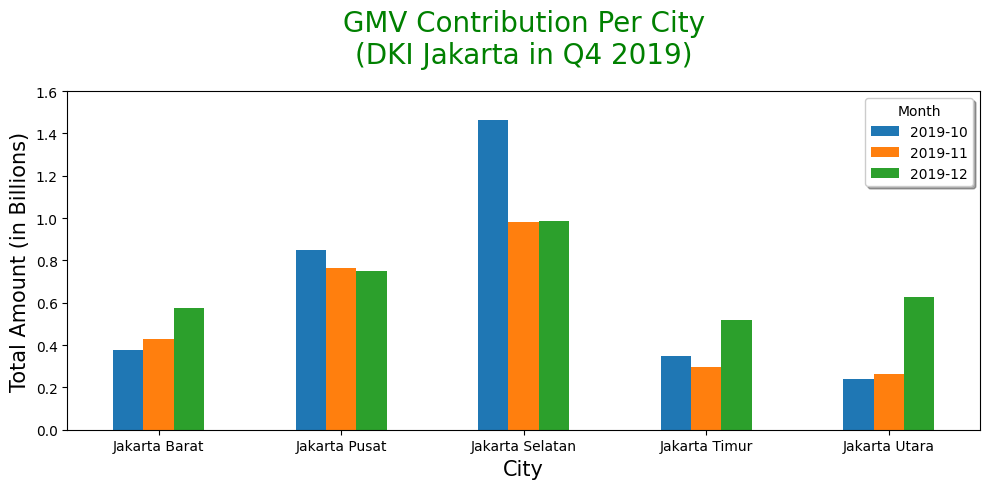

In [36]:
retail_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind = 'bar')
plt.title('GMV Contribution Per City\n(DKI Jakarta in Q4 2019)', loc = 'center',
          pad = 20, fontsize = 20, color = 'green')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 1), shadow = True, title = 'Month')
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#### Membuat stacked chart

In [37]:
retail_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().unstack()

city,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara
order_month,,,,,
2019-10,375094000,849294000,1462272000,348055000,237436000
2019-11,429780000,764062000,982906000,296121000,262095000
2019-12,575091000,751942000,984432000,519470000,628562000


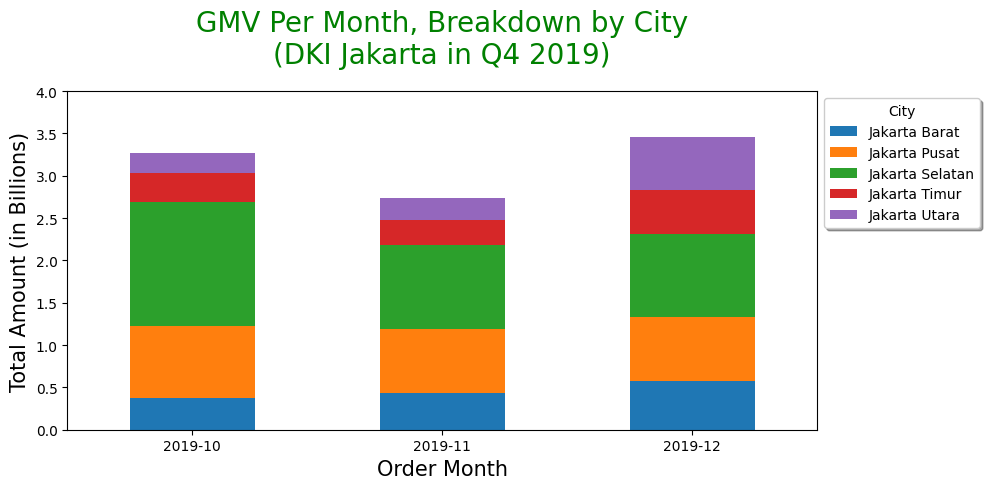

In [38]:
retail_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().unstack().plot(kind = 'bar', stacked = True)
plt.title('GMV Per Month, Breakdown by City\n(DKI Jakarta in Q4 2019)',
          loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, labels/1000000000)
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 1), shadow = True, title = 'City')
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#### Membuat agregat data customer

In [39]:
data_per_customer = retail_dki_q4.groupby('customer_id').agg({'order_id': 'nunique', 'quantity': 'sum', 'gmv': 'sum'})
data_per_customer = data_per_customer.reset_index().rename(columns = {'order_id': 'orders'})
data_per_customer.sort_values(by = 'orders', ascending = False)

,customer_id,orders,quantity,gmv
0,12748,29,557,175286000
662,17841,26,270,144788000
207,14606,13,25,20714000
25,13089,8,166,93554000
462,16549,8,29,22714000
...,...,...,...,...
294,15154,1,4,2689000
291,15148,1,12,5400000
289,15121,1,8,2424000
288,15117,1,1,3494000


#### Membuat histogram

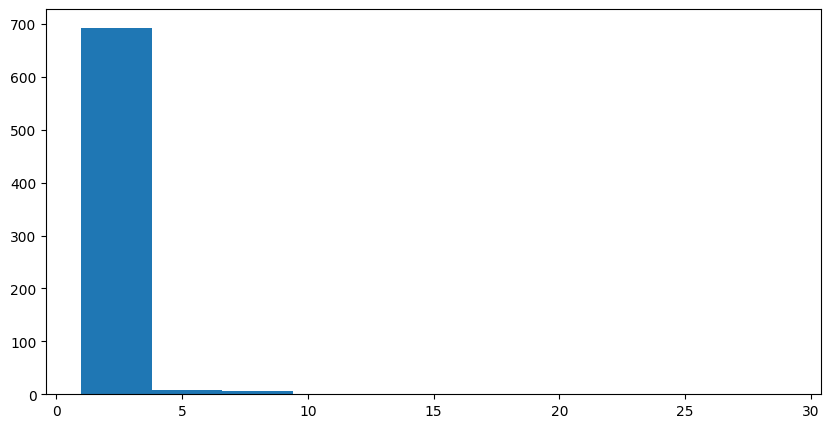

In [40]:
plt.figure(figsize = (10, 5))
plt.hist(data_per_customer['orders'])
plt.show()

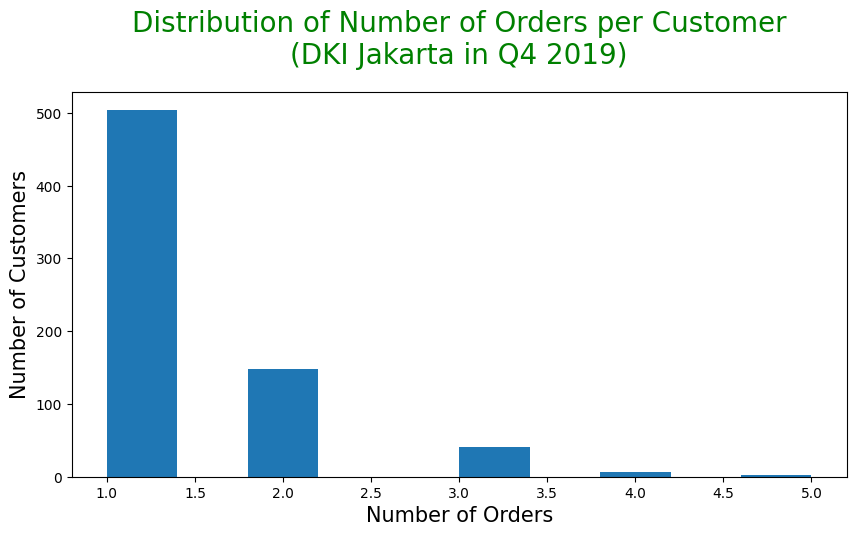

In [41]:
plt.figure(figsize = (10, 5))
plt.hist(data_per_customer['orders'], range = (1, 5))
plt.title('Distribution of Number of Orders per Customer\n(DKI Jakarta in Q4 2019)',
          pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Number of Orders', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.show()

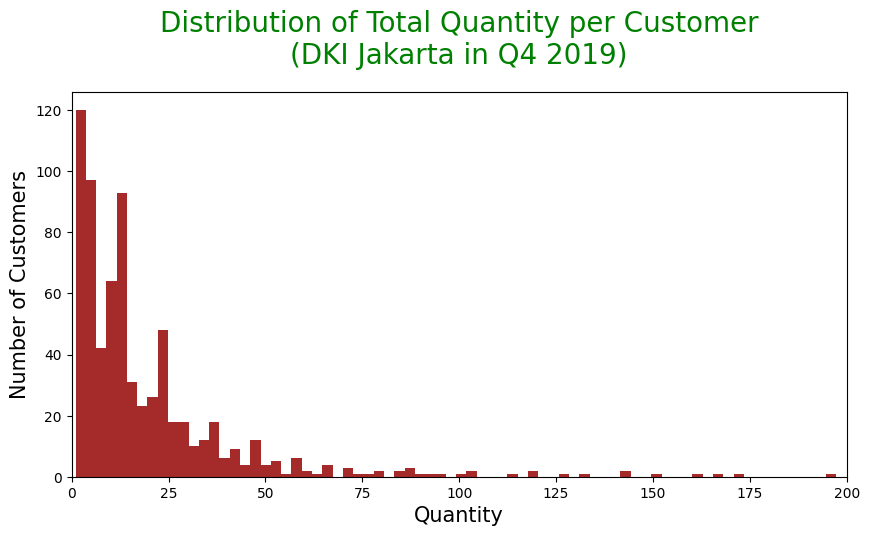

In [42]:
plt.figure(figsize = (10, 5))
plt.hist(data_per_customer['quantity'], bins = 75, range = (1, 200), color = 'brown')
plt.title('Distribution of Total Quantity per Customer\n(DKI Jakarta in Q4 2019)',
          pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Quantity', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xlim(xmin = 0, xmax = 200)
plt.show()

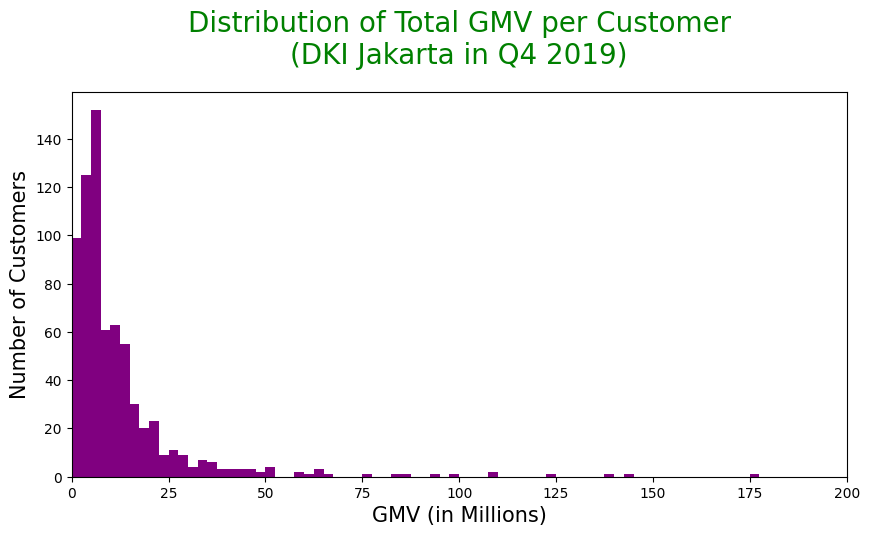

In [43]:
plt.figure(figsize = (10, 5))
plt.hist(data_per_customer['gmv'], bins = 80, range = (1, 200000000), color = 'purple')
plt.title('Distribution of Total GMV per Customer\n(DKI Jakarta in Q4 2019)', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('GMV (in Millions)', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xlim(xmin = 0, xmax = 200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

#### Membuat scatterplot

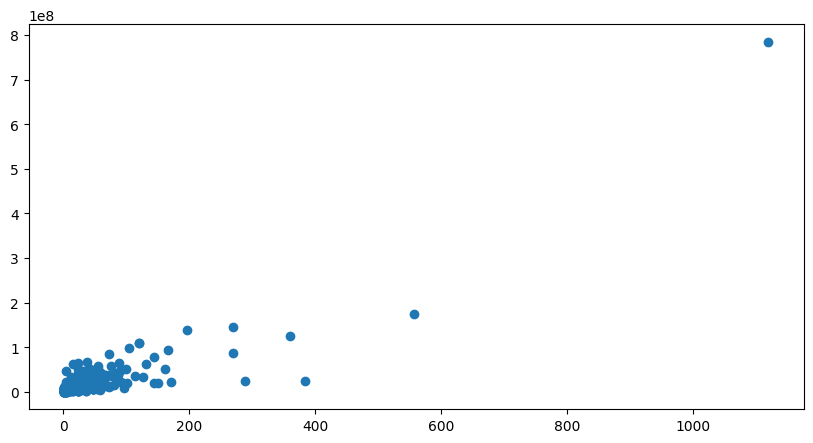

In [44]:
plt.figure(figsize = (10, 5))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

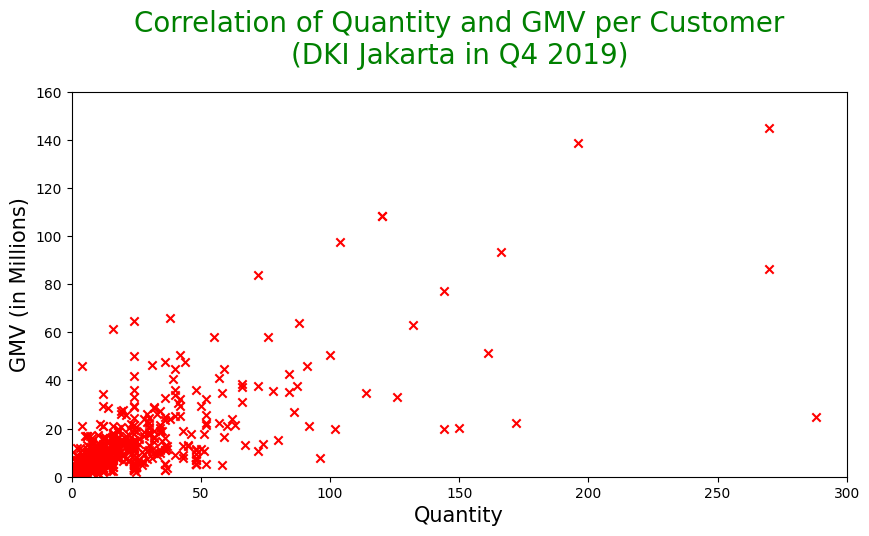

In [45]:
plt.figure(figsize = (10, 5))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker = 'x', color = 'red')
plt.title('Correlation of Quantity and GMV per Customer\n(DKI Jakarta in Q4 2019)',
          pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Quantity', fontsize = 15)
plt.ylabel('GMV (in Millions)', fontsize = 15)
plt.xlim(xmin = 0, xmax = 300)
plt.ylim(ymin = 0, ymax = 150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()